# Sentiment Analysis with VADER

<img src="images/neg_pos.jpg" width="400" height="400">
* Below, I will analyze the sentiment in my two corpora using the VADER process. VADER sentiment analysis, from the natural language toolkit, is designed to analyze sentiment (the positive and negative sentiment) for data specifically from social media sources.

* I will first tokenize my corpora and then separate the tweets that are specifically related to either mask, vaccine, or economy related words.

* Next, I will graph the sentiment averages per week on a seven day rolling average and compare across the two corpora and the three different pandemic-related topics

* Next, I will find the "peak polarization" moment for each subset of pandemic-related words and do a deep dive into what is the difference between those tweets.

* Finally, I will find the difference in means between corpora for each pandemic-related topic, masks, vaccines, and economy, to understand where the major differences lie between the corpora. I will be performing this analysis by splitting the data into four even groups based approximately on seasons.

* Ultimately, this notebook will help me to test my Hypothesis #3 which states:
**Liberals are more likely to have positive sentiment surrounding the vaccines, masks, and economy than conservatives who are more likely to utilize negative sentiment.**

In [57]:
##import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import statsmodels.api as sm
sid = SentimentIntensityAnalyzer()
import warnings
warnings.filterwarnings("ignore")

In [58]:
## load in the data
con_data=pd.read_csv("/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data/con_final_data.csv")
lib_data=pd.read_csv("/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data/liberal_data_final.csv")

In [61]:
##tokenize the data for the conservative corpus
con_tokens=[]
for i in range(0,con_data.shape[0]):
    tokens=tokenize.wordpunct_tokenize(con_data.loc[i, "text"])
    con_tokens.append(tokens)
con_data["tokens"]=con_tokens

In [62]:
## create a dataframe of mask related tweets and find a sentiment number per tweet
conservative_mask_tweets=[]
conservative_mask_tokens=[]
conservative_mask_created_at=[]
mask_words=["mask", "maskless","mandate"]
for i in range(0,con_data.shape[0]):
    for word in mask_words:
        if word in con_data.loc[i, "tokens"]:
            conservative_mask_tweets.append(con_data.loc[i, "text"])
            conservative_mask_tokens.append(con_data.loc[i, "tokens"])
            conservative_mask_created_at.append(con_data.loc[i, "created_at"])
con_mask_df=pd.DataFrame({"text":conservative_mask_tweets, "tokens": conservative_mask_tokens, "created_at": conservative_mask_created_at})
con_mask_df=con_mask_df.loc[con_mask_df.astype(str).drop_duplicates().index].copy()
sentiment_list=[]
for i in range(0,con_mask_df.shape[0]):
    tokens=con_data.loc[i, "tokens"]
    sentiment=sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)
    sentiment_list.append(sentiment)
con_mask_df["sentiment number"]=sentiment_list
con_mask_df.set_index(pd.to_datetime(con_mask_df['created_at']), inplace=True)
con_mask_df.sort_index(inplace=True)

In [63]:
## tokenize the data for liberal corpus
lib_data = lib_data.reset_index()
lib_tokens=[]
for i in range(0,lib_data.shape[0]):
    tokens=tokenize.wordpunct_tokenize(lib_data.loc[i, "text"])
    lib_tokens.append(tokens)
lib_data["tokens"]=lib_tokens

In [6]:
## create a dataframe of mask-related tweets and find a sentiment number per tweet
liberal_mask_tweets=[]
liberal_mask_tokens=[]
liberal_mask_created_at=[]
mask_words=["mask", "maskless","mandate"]
for i in range(0,lib_data.shape[0]):
    for word in mask_words:
        if word in lib_data.loc[i, "tokens"]:
            liberal_mask_tweets.append(lib_data.loc[i, "text"])
            liberal_mask_tokens.append(lib_data.loc[i, "tokens"])
            liberal_mask_created_at.append(lib_data.loc[i, "created_at"])
lib_mask_df=pd.DataFrame({"text":liberal_mask_tweets, "tokens": liberal_mask_tokens, "created_at": liberal_mask_created_at})
lib_mask_df=lib_mask_df.loc[lib_mask_df.astype(str).drop_duplicates().index].copy()
lib_mask_df= lib_mask_df.reset_index()
sentiment_list_lib=[]
for i in range(0,lib_mask_df.shape[0]):
    tokens=lib_mask_df.loc[i, "tokens"]
    sentiment=sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)
    sentiment_list_lib.append(sentiment)
lib_mask_df["sentiment number"]=sentiment_list_lib
lib_mask_df.set_index(pd.to_datetime(lib_mask_df['created_at']), inplace=True)
lib_mask_df.sort_index(inplace=True)

In [7]:
## create a dataframe of vaccine related tweets and find a sentiment number per tweet
conservative_vax_tweets=[]
conservative_vax_tokens=[]
conservative_vax_created_at=[]
vax_words=["vaccine", "vax","vaxxed", "pfizer", "moderna", "johnson", "dose"]
for i in range(0,con_data.shape[0]):
    for word in vax_words:
        if word in con_data.loc[i, "tokens"]:
            conservative_vax_tweets.append(con_data.loc[i, "text"])
            conservative_vax_tokens.append(con_data.loc[i, "tokens"])
            conservative_vax_created_at.append(con_data.loc[i, "created_at"])
con_vax_df=pd.DataFrame({"text":conservative_vax_tweets, "tokens": conservative_vax_tokens, "created_at": conservative_vax_created_at})
                        
con_vax_df = con_vax_df.loc[con_vax_df.astype(str).drop_duplicates().index].copy()
                        
sentiment_list=[]
for i in range(0,con_vax_df.shape[0]):
    tokens=con_data.loc[i, "tokens"]
    sentiment=sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)
    sentiment_list.append(sentiment)
                        
con_vax_df["sentiment number"]=sentiment_list
con_vax_df.set_index(pd.to_datetime(con_vax_df['created_at']), inplace=True)
con_vax_df.sort_index(inplace=True)

In [8]:
## create a dataframe of vaccine-related tweets and find a sentiment number per tweet
liberal_vax_tweets=[]
liberal_vax_tokens=[]
liberal_vax_created_at=[]
vax_words=["vaccine", "vax","vaxxed", "pfizer", "moderna", "johnson", "dose"]
for i in range(0,lib_data.shape[0]):
    for word in vax_words:
        if word in lib_data.loc[i, "tokens"]:
            liberal_vax_tweets.append(lib_data.loc[i, "text"])
            liberal_vax_tokens.append(lib_data.loc[i, "tokens"])
            liberal_vax_created_at.append(lib_data.loc[i, "created_at"])
lib_vax_df=pd.DataFrame({"text":liberal_vax_tweets, "tokens": liberal_vax_tokens, "created_at": liberal_vax_created_at})
lib_vax_df=lib_vax_df.loc[lib_vax_df.astype(str).drop_duplicates().index].copy()
lib_vax_df.reset_index(inplace=True)
sentiment_list_lib=[]
for i in range(0,lib_vax_df.shape[0]):
    tokens=lib_vax_df.loc[i, "tokens"]
    sentiment=sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)
    sentiment_list_lib.append(sentiment)
lib_vax_df["sentiment number"]=sentiment_list_lib
lib_vax_df.set_index(pd.to_datetime(lib_vax_df['created_at']), inplace=True)
lib_vax_df.sort_index(inplace=True)

In [9]:
## create a dataframe of economy-related tweets and find a sentiment number per tweet
conservative_econ_tweets=[]
conservative_econ_tokens=[]
conservative_econ_created_at=[]
econ_words=["jobs", "unemployment","lockdown", "restaurant", "closure", "economy", "recession"]
for i in range(0,con_data.shape[0]):
    for word in econ_words:
        if word in con_data.loc[i, "tokens"]:
            conservative_econ_tweets.append(con_data.loc[i, "text"])
            conservative_econ_tokens.append(con_data.loc[i, "tokens"])
            conservative_econ_created_at.append(con_data.loc[i, "created_at"])
con_econ_df=pd.DataFrame({"text":conservative_econ_tweets, "tokens": conservative_econ_tokens, "created_at": conservative_econ_created_at})
                        
con_econ_df = con_econ_df.loc[con_econ_df.astype(str).drop_duplicates().index].copy()
con_econ_df=con_econ_df.reset_index()
                        
sentiment_list=[]
for i in range(0,con_econ_df.shape[0]):
    tokens=con_econ_df.loc[i, "tokens"]
    sentiment=sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)
    sentiment_list.append(sentiment)
                        
con_econ_df["sentiment number"]=sentiment_list
con_econ_df.set_index(pd.to_datetime(con_econ_df['created_at']), inplace=True)
con_econ_df.sort_index(inplace=True)

In [10]:
## create a dataframe of economy -elated tweets and find a sentiment number per tweet
liberal_econ_tweets=[]
liberal_econ_tokens=[]
liberal_econ_created_at=[]
econ_words=["jobs", "unemployment","lockdown", "restaurant", "closure", "economy", "recession"]
for i in range(0,lib_data.shape[0]):
    for word in econ_words:
        if word in lib_data.loc[i, "tokens"]:
            liberal_econ_tweets.append(lib_data.loc[i, "text"])
            liberal_econ_tokens.append(lib_data.loc[i, "tokens"])
            liberal_econ_created_at.append(lib_data.loc[i, "created_at"])
lib_econ_df=pd.DataFrame({"text":liberal_econ_tweets, "tokens": liberal_econ_tokens, "created_at": liberal_econ_created_at})
lib_econ_df=lib_econ_df.loc[lib_econ_df.astype(str).drop_duplicates().index].copy()
lib_econ_df.reset_index(inplace=True)
sentiment_list_lib=[]
for i in range(0,lib_econ_df.shape[0]):
    tokens=lib_econ_df.loc[i, "tokens"]
    sentiment=sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)
    sentiment_list_lib.append(sentiment)
lib_econ_df["sentiment number"]=sentiment_list_lib
lib_econ_df.set_index(pd.to_datetime(lib_econ_df['created_at']), inplace=True)
lib_econ_df.sort_index(inplace=True)

In [11]:
## define a function which will calculate the differences in means
def calculate_season_mean2(lib_df,con_df):
    season_lib=np.array_split((list(lib_df["created_at"].sort_values().unique())), 4)
    season_con=np.array_split((list(con_df["created_at"].sort_values().unique())), 4)
    for i in range(0,len(season_lib)):
        start_date=season_lib[i][0]
        end_date=season_lib[i][-1]
        time_lib = (lib_df['created_at'] > start_date) & (lib_df['created_at'] <= end_date)
        lib_now=lib_df[time_lib]
        start_date=season_con[i][0]
        end_date=season_con[i][-1]
        time_con = (con_df['created_at'] > start_date) & (con_df['created_at'] <= end_date)
        con_now=con_df[time_con]
        con_now["ideology"]="C"
        lib_now["ideology"]="L"
        mean=(con_now["sentiment number"].mean()-lib_now["sentiment number"].mean())
        means_list.append(mean)
        print("The difference in means for season",i, "is",mean)

# <center> Plotting the Sentiment Data, Peak Polarization, & Difference in Means </center>

### <center> Plotting Sentiment Data: Mask-Related Words <center/>

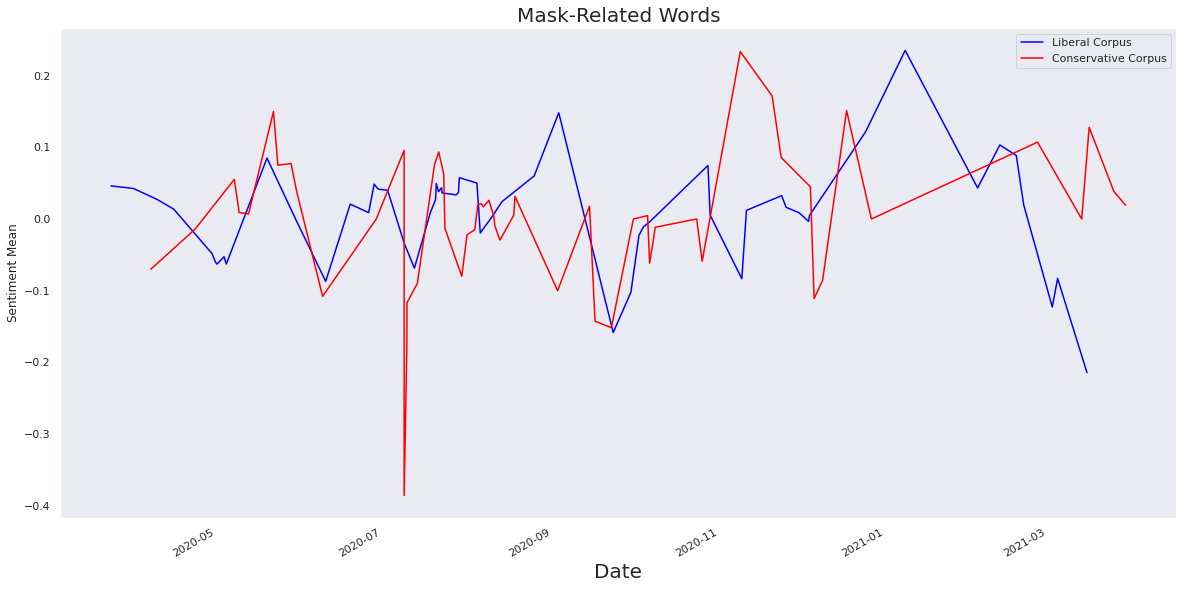

In [71]:
## plot the mask sentiment data for each corpora

plt.figure(figsize=(20,10))
lib_mask_df['sentiment number'].rolling('7D').mean().fillna(0).plot(label= "Liberal Corpus", color="blue")
con_mask_df['sentiment number'].rolling('7D').mean().fillna(0).plot(label= "Conservative Corpus",color="red")
plt.legend()
plt.title("Mask-Related Words", fontsize=20)
plt.grid(color='gray', linestyle='-.', linewidth=0.7)
plt.xlabel('Date', fontsize=20)
plt.ylabel("Sentiment Mean")
plt.show()

### Observations from Plot: Mask-Related Words
* A first glance at the sentiment data of tweets over the whole year, we see some major variations between the two corpora

* The largest differences appear to be from November 2020 to January 2021, and then again from January 2021 though March 2021. There is also a peak around September 2020, where there are some major differences between the corpora.
    
* This conclusion begs us to question, what other national events were occurring around these times that we could attribute these spikes to.

* The November to January peak could be attributed to the election controversy, but also the peak of the holidays and mask-wearing conversation surrounding these gatherings.
    
* The January 2021- March 2021 peak could be attributed to the darkest time of the pandemic, when death rates and infection rates reached their annual peak. Additionally, around this time, vaccine roll-out went into effect, which could have greatly impacted conversation surrounding the pandemic, masks, and otherwise.

* However, just eye-balling the distances on the graphs do not give a formal understanding of the differences.


### Peak Polarization Moment: Mask-Related Words

In [13]:
# get lib and con 7day avg
lib2 = lib_mask_df['sentiment number'].rolling('7D').mean().reset_index()
con2 = con_mask_df['sentiment number'].rolling('7D').mean().reset_index()

# assign first day of the week date to observations
lib2['week_start'] = lib2['created_at'].dt.to_period('W').apply(lambda r: r.start_time)
con2['week_start'] = con2['created_at'].dt.to_period('W').apply(lambda r: r.start_time)

# merge dataframes on first day of the week
merged_masks_diff = lib2.merge(con2,on='week_start')

# clean up df a bit
merged_masks_diff = merged_masks_diff[['week_start','sentiment number_x','sentiment number_y']]

# make difference score
merged_masks_diff['diff'] = np.abs(merged_masks_diff['sentiment number_x'] - merged_masks_diff['sentiment number_y'])

In [14]:
merged_masks_diff.sort_values('diff',ascending=False).head(10)

,week_start,sentiment number_x,sentiment number_y,diff
18,2020-07-06,-0.034022,-0.385507,0.351486
89,2021-03-15,-0.214286,0.127778,0.342063
22,2020-07-06,-0.068485,-0.385507,0.317022
68,2020-08-31,0.148000,-0.100000,0.248000
21,2020-07-06,-0.068485,0.095652,0.164137
19,2020-07-06,-0.034022,-0.179227,0.145205
50,2020-07-27,0.057555,-0.079710,0.137265
78,2020-10-26,0.074576,-0.058929,0.133505
17,2020-07-06,-0.034022,0.095652,0.129674
88,2020-12-21,0.121622,0.000000,0.121622


### Peak Polarization: July 2020

In [15]:
##create a date column
con_mask_df['date'] = pd.to_datetime(con_mask_df['created_at']).dt.date
lib_mask_df['date'] = pd.to_datetime(lib_mask_df['created_at']).dt.date

In [16]:
## retrieve tweets from July
july_lib=lib_mask_df[pd.to_datetime(lib_mask_df['date']).dt.month==7]
july_con=con_mask_df[pd.to_datetime(con_mask_df['date']).dt.month==7]

In [17]:
## find july tweets for conservative corpus
july_con=july_con.reset_index(drop=True)
july_con_text=[]
for i in range(0,july_con.shape[0]):
    july_con_text.append(july_con.loc[i, "text"])
july_con_text

['@squashakitty So you wear a mask 8 hours a day then,  not 30 minutes at the grocery.  That only applies to the retired or unemployed.',
 '@squashakitty Shove your mask up your ass.',
 "@Tha_molokodude @GovAndyBeshear And your mask still doesn't work.",
 'This mask BS is a Left vs Right thing. \nA nationalists vs globalist thing.\nIt is not about health.\n\nIt has many underlying purposes, one being to stop Trump this November.',
 'What’s pisses  u off more wearing a mask &amp; social distancing or being locked up at home???Wear a Fucking Mask &amp; Social Distance because I don’t like being locked up..',
 "@lawhawk It was never about the 😷 #mask.\nIt was never about #abortion.\nIt was never about gays.\n\nThe primary target of #whitesupremacy (since even BEFORE the founding of this Republic) ... of this craxy bitch's wrath has and will in the foreseeable future be — The Blacks. https://t.co/ODcSmRc6W8",
 'Disney bans eating, drinking while walking in face mask crackdown @washtimes ht

In [18]:
## find july tweets from liberal corpus
july_lib=july_lib.reset_index(drop=True)
july_lib_text=[]
for i in range(0,july_lib.shape[0]):
    july_lib_text.append(july_lib.loc[i, "text"])
july_lib_text

['Now that President Trump has finally said that he’s “all for masks” amid a massive surge in coronavirus cases, "Fox &amp; Friends" co-host Steve Doocy wondered why wearing a mask to slow the spread of COVID-19 ever became politicized https://t.co/4a7Q0YoIM3',
 "Humiliation for #TeamTrump as Tulsa sees Covid-19 surge in the wake of Trump's June rally. Communications director Tim Murtaugh pathetically claims “everyone was provided a mask,” though pictures from the event prove they weren’t worn. #TulsaDeathRally  https://t.co/k0rKkAoEve",
 'We wanted to know if there was any science to back up those "contagion probability" photos. Wearing a mask is likely to interfere with the spread of COVID-19. But the exact percentages in this social media image don’t hold up to scrutiny. https://t.co/EcB958GTt8\n@KHNews',
 'Thinking about hosting an outdoor BBQ? \n\n@DrSanjayGupta shares safety tips.\n\n🍖 Keep it small\n🍖 Have socially distanced seating\n🍖 Route guests through the yard, not the hous

### <center> Peak Polarization Moment: Mask-Related Words, Observations <center/>
    
* The week of July 6th, is the moment with the greatest difference in sentiment regarding mask-related words for conservatives and liberals
    
* Analyzing tweets from the month of July (because there are few tweets in each corpus) helps convey the idea that there are some very strongly-worded tweets in the conservative corpus which is what is driving this sentiment and behavior
    
* In this subset, the liberal corpus has fairly neutral tweets regarding masks, conservatives are more likely to display negative sentiment around this time

### Difference in Means: Mask-Related Words 

The difference in means for season 0 is -0.015563665897426021
The difference in means for season 1 is -0.02992671038932215
The difference in means for season 2 is -0.03379926662201536
The difference in means for season 3 is 0.04019590438090164


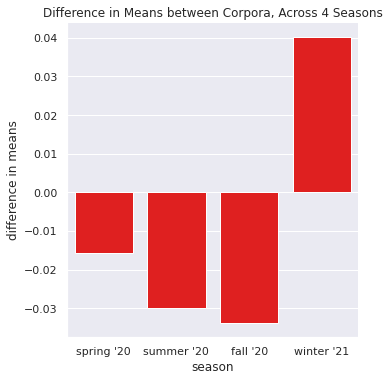

In [70]:
means_list=[]
calculate_season_mean2(lib_mask_df,con_mask_df)
seasons_list=["spring '20", "summer '20", "fall '20", "winter '21"]
df=pd.DataFrame()
df["season"]=seasons_list
df["difference in means"]= means_list
sns.catplot(x="season", y="difference in means", data=df, kind="bar", color="red")
plt.title("Difference in Means between Corpora, Across 4 Seasons")
plt.show();

### <center> Observations from Difference in Means: Mask-Related Words <center/>

* The differences between means by season are not huge in this graph.

* However, what we notice is that there is a distinctive difference in means in the last seasons, where conservatives are more positive than liberals.

* In all the previous seasons, conservatives are more negative than liberals.
    
* The winter is the season which is "closest" to the end of the pandemic, which is an interesting finding. Possibly, conservatives are more excited about not wearing masks with vaccine-rollout and a general feeling that we are nearing the end of the pandemic

### Plotting Sentiment Data: Vaccine-Related Words

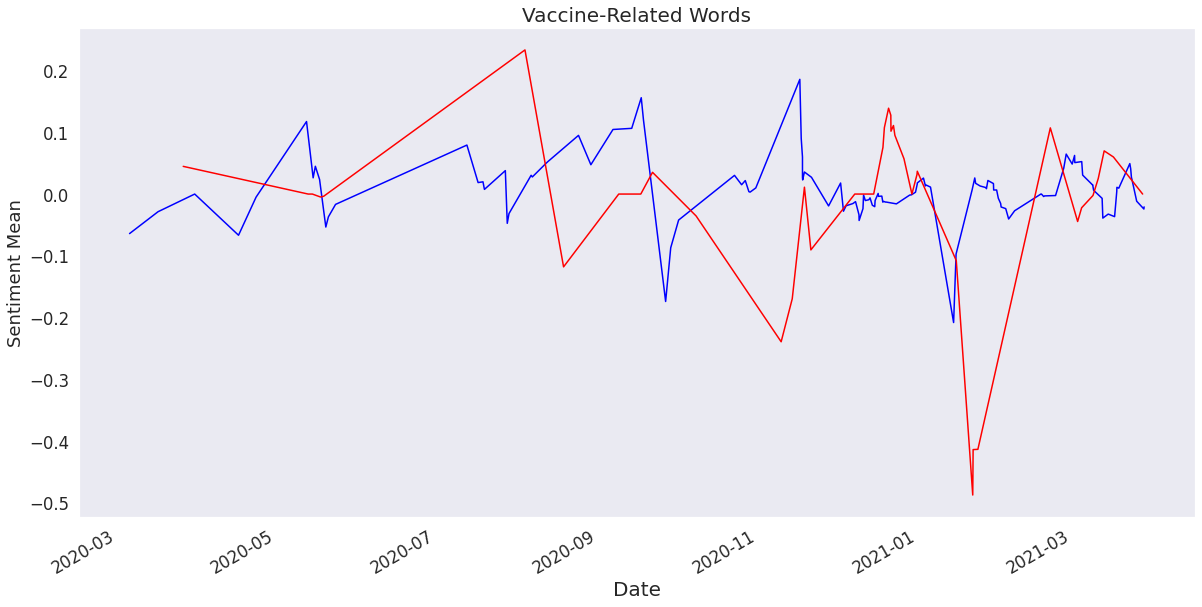

In [48]:
## plot the vaccine sentiment data
sns.set(font_scale =1.5)
plt.figure(figsize=(20,10)) 
lib_vax_df['sentiment number'].rolling('7D').mean().fillna(0).plot(label="Liberal Corpus",color="blue")
con_vax_df['sentiment number'].rolling('7D').mean().fillna(0).plot(label="Conservative Corpus", color="red")
plt.title("Vaccine-Related Words",fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel("Sentiment Mean")
plt.grid(color='gray', linestyle='-.', linewidth=0.7)
plt.show()

### Observations from Plot: Vaccine-Related Words    
* For vaccine-related words, we see the same/similar trends for where the corpora appear to be the most dissimilar
    
* Again, November to January, and early 2021 are some of the greatest differences between the corpora. 
    
* Keeping in mind these differences are fairly weak, it begs us to understand these differences formally a closer look at some of the biggest differences and the differences in means

### Peak Polarization Moment: Vaccine-Related Words

In [64]:
# get lib and con 7day avg
lib2 = lib_vax_df['sentiment number'].rolling('7D').mean().reset_index()
con2 = con_vax_df['sentiment number'].rolling('7D').mean().reset_index()

# assign first day of the week date to observations
lib2['week_start'] = lib2['created_at'].dt.to_period('W').apply(lambda r: r.start_time)
con2['week_start'] = con2['created_at'].dt.to_period('W').apply(lambda r: r.start_time)

# merge dataframes on first day of the week
merged_masks_diff = lib2.merge(con2,on='week_start')

# clean up df a bit
merged_masks_diff = merged_masks_diff[['week_start','sentiment number_x','sentiment number_y']]

# make difference score
merged_masks_diff['diff'] = np.abs(merged_masks_diff['sentiment number_x'] - merged_masks_diff['sentiment number_y'])

In [65]:
merged_masks_diff.sort_values('diff',ascending=False).head(10)

,week_start,sentiment number_x,sentiment number_y,diff
118,2021-01-18,0.026042,-0.487255,0.513297
121,2021-01-18,0.017361,-0.487255,0.504616
124,2021-01-18,0.013021,-0.487255,0.500276
115,2021-01-18,0.006897,-0.487255,0.494151
119,2021-01-18,0.026042,-0.413725,0.439767
120,2021-01-18,0.026042,-0.413262,0.439303
122,2021-01-18,0.017361,-0.413725,0.431087
123,2021-01-18,0.017361,-0.413262,0.430623
125,2021-01-18,0.013021,-0.413725,0.426746
126,2021-01-18,0.013021,-0.413262,0.426282


### Peak Polarization: January 2021

In [66]:
##create a date column
con_vax_df['date'] = pd.to_datetime(con_vax_df['created_at']).dt.date
lib_vax_df['date'] = pd.to_datetime(lib_vax_df['created_at']).dt.date

In [67]:
##create data frame with tweets
jan_con=con_vax_df[pd.to_datetime(con_vax_df['date']).dt.month==1]
jan_lib=lib_vax_df[pd.to_datetime(lib_vax_df['date']).dt.month==1]

In [68]:
##display conservative tweets from this time
jan_con=jan_con.reset_index(drop=True)
jan_con_text=[]
for i in range(0,jan_con.shape[0]):
    jan_con_text.append(jan_con.loc[i, "text"])
jan_con_text

['Norwegian medical experts warn COVID-19 vaccine side effects could be devastating for patients over 80 and the terminally ill https://t.co/Zs4mySuFn9',
 "I had COVID, so did hubs. He was 100x's worse than me. HCQ+Ivermectin+D3+Zinc protocol had us feeling better within HOURS. \nIt's time to get that in every household. \nWe do not need to spend all this money on a vaccine.",
 "CNN report bashes Trump admin for 'nonexistent' vaccine plan, Dr. Fauci and others implode the 'scoop' https://t.co/QPQFOXze5Z",
 'FYI since President Comeonman’s admin says there was/is no distribution of vaccine “U.S. CDC says 41.4 million doses of COVID-19 vaccines distributed, 20.5 million administered”  https://t.co/M36WPt7iQP']

In [26]:
##display liberal tweets from this time
jan_lib=jan_lib.reset_index(drop=True)
jan_lib_text=[]
for i in range(0,jan_lib.shape[0]):
    jan_lib_text.append(jan_lib.loc[i, "text"])
jan_lib_text

['"What we\'re lacking right now from the Trump admin. is a national vaccination strategy and a plan," vaccine specialist Dr. Bright says, adding  "what we need desperately to be successful in ending this pandemic is a new change of attitude at the very top"\nhttps://t.co/hlCueiKowE',
 'Many frontline workers in hospitals and nursing homes have refused to take the Covid-19 vaccine, a hurdle for public health officials as the US struggles to roll out inoculations around the country.  https://t.co/ouZ9UuSr7I',
 'Federal officials have said the U.S. will need to vaccinate roughly 80% of the population to achieve herd immunity against coronavirus and are looking for ways to quickly ramp up immunization efforts — including giving half a dose of the Moderna vaccine https://t.co/B48o4pxmJS',
 'The US is middle of the pack when it comes to vaccine skepticism (via @kdrum) https://t.co/2NKbDMqkGi',
 'The vaccine process has been a disaster nationally, but some states are worse off than others.\n

### Peak Polarization Moment: Vaccine-Related Words, Observations
* Here, the peak polarization moment is January 18th, 2021
    
* For all tweets in January, there are some big differences between liberal and conservative corpus.
    
* There is a lot of discussion in the liberal corpus about how the vaccine rollout is going, the rise of vaccine skepticism, and the science behind herd immunity and vaccination
    
* In the conservative corpus, there is really no mention of any of these topics, rather there is some discussion of vaccine skepticism

### <center> Difference in Means: Vaccine-Related Words <center/>

The difference in means for season 0 is -0.0005358249364440897
The difference in means for season 1 is 0.004586435095384262
The difference in means for season 2 is -0.07656252542918868
The difference in means for season 3 is 0.01251955878147109


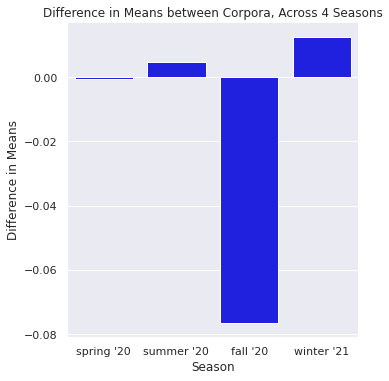

In [72]:
sns.set(font_scale =1)
means_list=[]
calculate_season_mean2(lib_vax_df,con_vax_df)
seasons_list=["spring '20", "summer '20", "fall '20", "winter '21"]
df=pd.DataFrame()
df["season"]=seasons_list
df["difference in means"]= means_list
sns.catplot(x="season", y="difference in means", data=df, kind="bar", color="blue")
plt.title("Difference in Means between Corpora, Across 4 Seasons")
plt.xlabel("Season")
plt.ylabel("Difference in Means")
plt.show();

### Observations from Difference in Means: Vaccine-Related Words
* The differences between means by season are not huge in this graph.

* However, what we notice is that there is a distinctive difference in means in the third season, where conservatives are more negative than liberals.

* All other seasons the conservatives are more positive.
    
* Given that we are discussing vaccine-related data, it is interesting to note here that vaccines are being first rolled out at the end of this season.

### Plotting Sentiment Data: Econmy-Related Words 

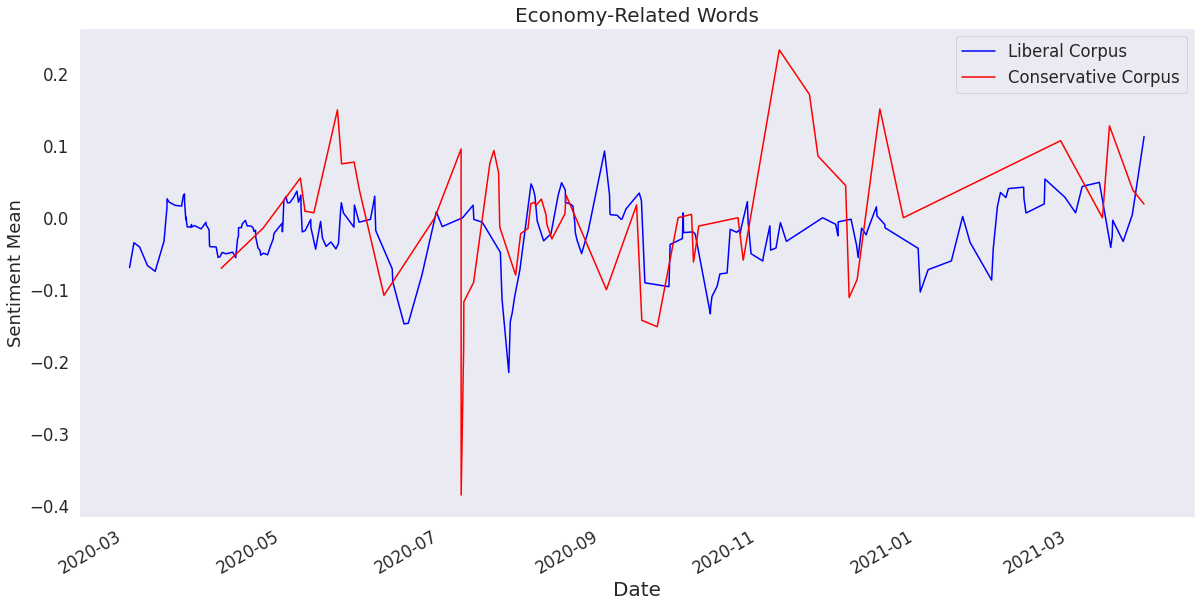

In [73]:
## plot the economy sentiment data
sns.set(font_scale =1.5)
plt.figure(figsize=(20,10)) 
lib_econ_df['sentiment number'].rolling('7D').mean().fillna(0).plot(label= "Liberal Corpus", color="blue")
con_mask_df['sentiment number'].rolling('7D').mean().fillna(0).plot(label= "Conservative Corpus",color="red")
plt.legend()
plt.title("Economy-Related Words", fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel("Sentiment Mean")
plt.grid()
plt.show()

### Observations from Plot: Economy-Related Words    
* For econmy-related words, we see the same/similar trends for where the corpora appear to be the most dissimilar. However, some of the peaks are a lot smaller for this subset of words.
    
* Again, November-January, and early 2021 are some of the greatest differences between the corpora.
 

### <center> Peak Polarization Moment: Economy-Related Words <center/>

In [29]:
# get lib and con 7day avg
lib2 = lib_econ_df['sentiment number'].rolling('7D').mean().reset_index()
con2 = con_econ_df['sentiment number'].rolling('7D').mean().reset_index()

# assign first day of the week date to observations
lib2['week_start'] = lib2['created_at'].dt.to_period('W').apply(lambda r: r.start_time)
con2['week_start'] = con2['created_at'].dt.to_period('W').apply(lambda r: r.start_time)

# merge dataframes on first day of the week
merged_masks_diff = lib2.merge(con2,on='week_start')

# clean up df a bit
merged_masks_diff = merged_masks_diff[['week_start','sentiment number_x','sentiment number_y']]

# make difference score
merged_masks_diff['diff'] = np.abs(merged_masks_diff['sentiment number_x'] - merged_masks_diff['sentiment number_y'])

In [30]:
merged_masks_diff.sort_values('diff',ascending=False).head(10)

,week_start,sentiment number_x,sentiment number_y,diff
517,2020-11-02,-0.060130,0.233333,0.293463
518,2020-11-02,-0.053603,0.233333,0.286936
520,2020-11-02,-0.045081,0.233333,0.278414
521,2020-11-02,-0.042065,0.233333,0.275398
519,2020-11-02,-0.011219,0.233333,0.244552
446,2020-08-10,0.048679,-0.166667,0.215346
496,2020-10-12,-0.133611,0.078947,0.212559
497,2020-10-12,-0.124494,0.078947,0.203442
429,2020-08-03,0.047101,-0.153182,0.200284
445,2020-08-10,0.031573,-0.166667,0.198239


### Peak Polarization: November 2020

In [31]:
##create dataframe with dates
con_econ_df['date'] = pd.to_datetime(con_econ_df['created_at']).dt.date
lib_econ_df['date'] = pd.to_datetime(lib_econ_df['created_at']).dt.date

In [32]:
##create dataframes with just tweets from polarization moment
nov_con=con_econ_df[pd.to_datetime(con_econ_df['date']).dt.month==11]
nov_lib=lib_econ_df[pd.to_datetime(lib_econ_df['date']).dt.month==11]

In [33]:
##display conservative tweets from this time
nov_con=nov_con.reset_index(drop=True)
nov_con_text=[]
for i in range(0,nov_con.shape[0]):
    nov_con_text.append(nov_con.loc[i, "text"])
nov_con_text

['Another story has revealed the human cost of lockdown as video footage revealed the moment a great-great-grandmother with dementia living in a care home was told she couldn’t hug her daughter. https://t.co/dyBF6Z8K0z',
 "This power-crazed women has snubbed the state Supreme Court with her new lockdown and will now face impeachment articles of impeachment. It's about time!\n\nhttps://t.co/mf7ynfabyP",
 '“If they extend this lockdown we are going to have a civil war.”\n\nhttps://t.co/TqOSvTTdLF',
 "Oregon's leftist governor tells residents to call police on neighbors who violate her new COVID lockdown edicts #ICYMI https://t.co/K4xPeZVw5d",
 '‘BBQ IS ESSENTIAL’: https://t.co/w19qelThzJ Reporter seems personally offended that law enforcement didn’t shut down barbecue restaurant #ccot #dems #gop #libcrib #lnyhbt #maga #msm #ofa #p2 #resist #tcot #tlot #uniteblue',
 'FRAUD: California prisoners and death-row inmates stole up to $1 billion with fraudulent unemployment claims  https://t.co/

In [34]:
## display liberal tweets from this time
nov_lib=nov_lib.reset_index(drop=True)
nov_lib_text=[]
for i in range(0,nov_lib.shape[0]):
    nov_lib_text.append(nov_lib.loc[i, "text"])
nov_lib_text

['How does the VIP economy work? Model-turned-sociologist Ashley Mears went behind the red rope https://t.co/CpJg3zJljo From @1843mag',
 'This is the last opportunity Floridians have to cast their ballots and make their voices heard. With all that we are facing as a nation, @JoeBiden and @KamalaHarris will bring us back together, rebuild our economy, and respond to the COVID-19 crisis with the urgency required. https://t.co/mC65VK2tjA',
 "Up to 3,500 jobs at risk at Sainsbury's as firm cuts 400 Argos stores https://t.co/IaVcxGU5AM",
 'Man admits killing his children during UK lockdown https://t.co/Xzpv5fKBPJ',
 'UK students: how are you affected by the lockdown in England? https://t.co/IPYqlezd4A',
 'For every coal job there are 8 2/3 clean energy jobs. (75,000 coal jobs vs 650,000 clean energy jobs.)\n\nLet that sink in.',
 "Those Election Day losses  down-ballot have hurt the ambitions of a bunch of Dems in Congress who were eyeing Cabinet jobs. Democrats don't want to risk a special

### <center> Peak Polarization Moment: Economy-Related Words, Observations <center/>
    
* For economy-related words, the peak polarization moment happens in the weeks in November
    
* The content in these tweets surround the election.
    
* In the conservative corpus there is discussion of fraudulent unemployment claims

* In the liberal corpus there is some discussion surrounding restaurants and lockdowns.

### Difference in Means: Economy-Related Words

The difference in means for season 0 is -0.01832471232155335
The difference in means for season 1 is 0.009640673917475046
The difference in means for season 2 is 0.012041115824464894
The difference in means for season 3 is -0.005158206894929487


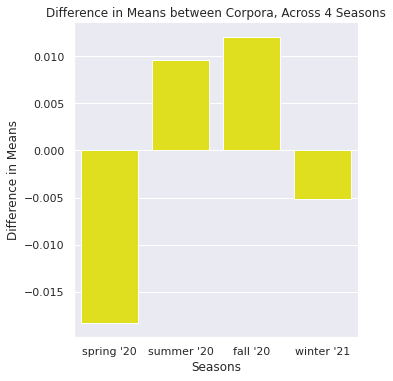

In [56]:
sns.set(font_scale =1)
means_list=[]
calculate_season_mean2(lib_econ_df,con_econ_df)
seasons_list=["spring '20", "summer '20", "fall '20", "winter '21"]
df=pd.DataFrame()
df["season"]=seasons_list
df["difference in means"]= means_list
sns.catplot(x="season", y="difference in means", data=df, kind="bar", color="yellow")
plt.title("Difference in Means between Corpora, Across 4 Seasons")
plt.xlabel("Seasons")
plt.ylabel("Difference in Means")
plt.show();

### Observations from Difference in Means: Economy-Related Words
* Conservatives are most negative about the economy at the start of the pandemic, and again towards the end.
    
* During the middle of the pandemic, when things are getting particularly bad, conservatives are more positive, interestingly.

### <center> Plotting Sentiment Data: All Pandemic Related Words <center/>

In [36]:
## create dataframes
result_lib = pd.concat([lib_mask_df, lib_vax_df, lib_econ_df])
result_con = pd.concat([con_mask_df, con_vax_df, lib_econ_df])
result_lib.set_index(pd.to_datetime(result_lib['created_at']), inplace=True)
result_lib.sort_index(inplace=True)
result_con.set_index(pd.to_datetime(result_con['created_at']), inplace=True)
result_con.sort_index(inplace=True)

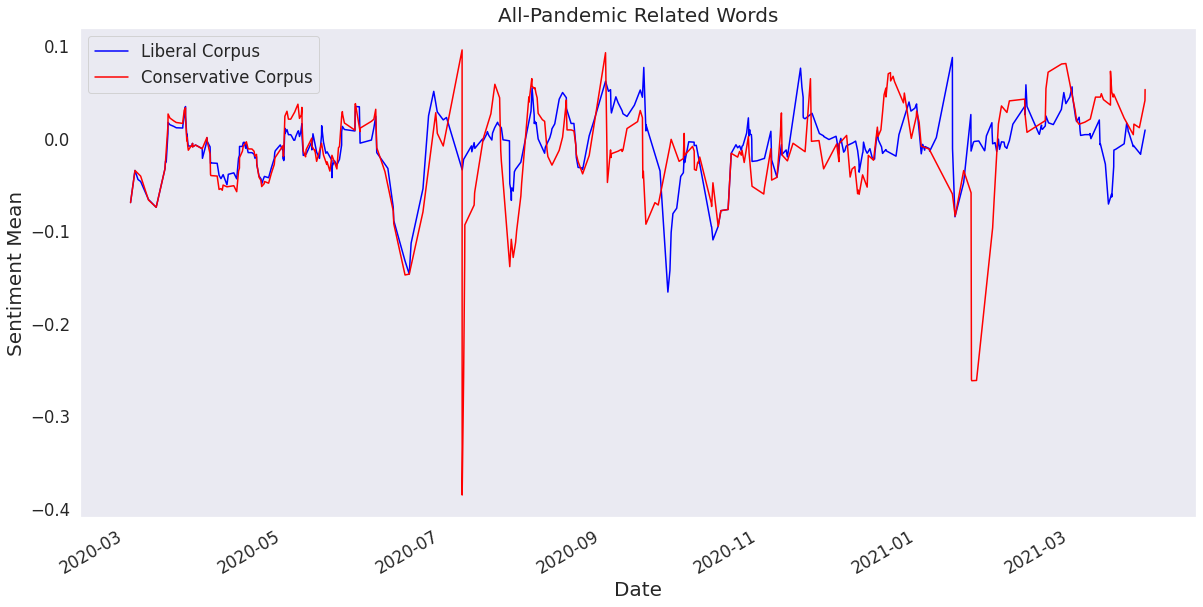

In [45]:
## plot the results
sns.set(font_scale =1.5)
plt.figure(figsize=(20,10)) 
result_lib['sentiment number'].rolling('7D').mean().fillna(0).plot(label= "Liberal Corpus", color="blue")
result_con['sentiment number'].rolling('7D').mean().fillna(0).plot(label= "Conservative Corpus",color="red")
plt.legend()
plt.title("All-Pandemic Related Words", fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel("Sentiment Mean", fontsize=20)
plt.grid()
plt.show()

### Observations from Plot: All Pandemic-Related Words    
* Looking at the general trend over time, liberals and conservatives follow a similar pattern in sentiment between all of the words, however, it is interesting that in specific instances they diverge quite a bit.
    
* Around July and early 2021, there appears to be a drop in conservative sentiment positivity and a spike in liberal sentiment positivity.

### <center> Difference in Means: All Pandemic-Related Words <center/>

The difference in means for season 0 is 0.0002823625590191014
The difference in means for season 1 is -0.02161998408641619
The difference in means for season 2 is -0.011198131862787713
The difference in means for season 3 is -0.0021832162973478945


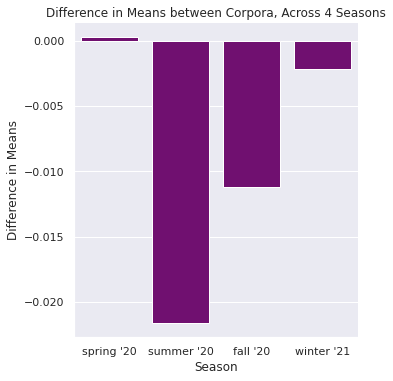

In [74]:
sns.set(font_scale =1)
means_list=[]
calculate_season_mean2(result_lib,result_con)
seasons_list=["spring '20", "summer '20", "fall '20", "winter '21"]
df=pd.DataFrame()
df["season"]=seasons_list
df["difference in means"]= means_list
sns.catplot(x="season", y="difference in means", data=df, kind="bar", color="purple")
plt.title("Difference in Means between Corpora, Across 4 Seasons")
plt.xlabel("Season")
plt.ylabel("Difference in Means")
plt.show();

### Observations from Difference in Means: Pandemic-Related Words     
* Interestingly, conservatives are the most negative during the two-middle seasons of the pandemic.
    
* This is worthy to note because I think these months make up the "hardest" or "darkest" times of the pandemic.
    
* In many ways we didn't know how bad it was going to be at the beginning and in the final season we have the hope of the vaccine and reopening to keep people positive.

# Sentiment Analysis with VADER: Conclusion 

<img src="images/lib_con_1.jpg" width="400" height="400">
* Ultimately, while the graphed sentiment analysis appears to indicate that there are some significant differences between the corpora and their discussion of certain words such as mask, vaccine, and economy words, the difference in means show that for different topics, conservatives and liberals fluctuate on who is more negative and who is more positive at different moments throughout the pandemic.

* In the final graph, we can conclude that perhaps, there is a lot of similarity in the degree of sentiment differences and the division is less divisive than we make it out to be.

* My Hypothesis #3, assumes that liberals would be more positive on these dimensions and conservatives more negative, which does not appear to be the case. It is still interesting that my hypothesis was rejected, defying expectations. 

* Possibly, the clearest differences between these groups ultimately lies not in sentiment analysis but in keyness and KWIC analysis.

* Therefore, more investigation is necessary. 